# Итоговый проект

## 1. Введение

Этот проект - часть моего большого исследования про типологию порядковых числительных.

До этого я занималась в основном их морфологией, но нередко при обсуждении порядковых числительных с другими людьми оказывалось, что контексты, в которых можно встретить порядковые числительные, разнятся от языка к языку. Например, один носитель испанского сказал мне, что в русском порядковые числительные встречаются гораздо чаще, чем в испанском. В общем, со временем назрел вопрос: в каких контекстах в русском языке вообще можно встретить порядковые числительные? Ответ на этот вопрос - главная задача этого проекта.

Дисклеймер: я поздно поняла, что поставила перед собой слишком большую задачу, поэтому у меня не получилось сделать тут всё настолько тщательно, насколько мне бы хотелось. Но лично для меня это хороший старт, датафреймы, которые получились в результате этого проекта, можно будет использовать и изучать уже после конца этого курса.

### Данные

Я выкачала выдачу НКРЯ по запросу "числительное-прилагательное". Параметры выкачивания я никаким специальным образом не настраивала, кроме того, что отсортировала примеры в выдаче не по умолчанию, а в случайном порядке. Всего выкачалось 5000 вхождений. Они в неизменном виде лежат в файле *ruscorpora_content.csv*.

В разделе 2 есть код, оставляющий в этом датафрейме только выбранные мной столбцы. Итоговый датафрейм лежит в файле *ordinals.csv*.

Дальше этот файл я изменяла вручную. Для первых 800 примеров я разметила тип контекста. Также я заменила вручную числительные, записанные цифрами (например, "90-е" на "девяностые"), а также убрала из первых 800 строк те примеры, в которых на самом деле были не порядковые числительные и которые попали в выдачу нкря по ошибке. В итоге получился файл *ordinals_with_coding.xlsx*.

Типы контекстов в моей разметке:
* order in time - упорядочивание событий по времени ("нашёл в первом же магазине" - то есть в магазине, в который зашёл первым, "пятая посылка шла 20 дней" - посылка, отправленная пятой и тд.)
* deictic order - контексты типа "из первых рук", "от третьего лица"
* order in importance - контексты типа "в первую очередь", "первая причина", "первый заместитель министра"
* proper name - "первая/вторая мировая", "Третий рейх" и всё такое
* linear order - про штуки, которые пространственно или темпорально идут подряд: "третий этаж", "второй слог", "пятый день льёт дождь"
* times - конструкции типа "i-тый раз"
* every ord - конструкции типа "каждый третий"
* quantity order и size - про упорядочиванию по размеру
* beginning - конструкции типа "первые месяцы работы"
* anaphoric order - порядок, в котором отсылают к участникам из предыдущего контекста: "в комнату зашли три мальчика, первый сказал х, второй ответил, что у, третий молча посмотрел"
* time period - десятилетия ("шестидесятые")
* fraction(s) - знаменатель дроби
* date - число/месяц/год ("первого августа", "в девяносто третьем")
* half hour - конструкции типа "половина второго"
* contest place - про места в состязании ("первое место на олимпиаде")
* classes - про школьные классы ("мой сын уже пошёл в пятый")
* one more - контексты, в которых порядковое числительное можно заменить на "ещё один"
* address - номер дома/квартиры
* power - степени ("три во второй степени это девять")
* rulers - номера правителей (Пётр I, Людовик XIV и т.д.)
* number - плейсхолдер для тех контекстов, где я не очень понимала значение порядкового числительного (например, там была куча примеров из текста про яхты, где всё время упоминались "вторая генуя" и другие вещи, и я не разбираюсь в теме, поэтому не смогла это нормально откодировать). Также сюда попали всякие номера рейсов, палат в больнице и так далее.
* idiom - для тех фразеологизмов, где порядковое значение уже не считывается ("по первое число", "пятая точка")
* adverbial - не приименные контексты (типа "в-третьих")
* hours - штуки типа "во втором часу пополудни"

В разделе 2 также есть код, в котором я добавляю к этому датафрейму столбцы с леммой, падежом, числом и родом. Эти данные лежат в файле *final_df.csv*.

### Цели

- Посмотреть на распределение порядковых числительных по номиналу
- Посмотреть на типы контекстов, в которых встречаются порядковые числительные
- Посмотреть, есть ли какая-то связь между номиналом числительного и типом контекста, в котором оно используется
- Посмотреть на распределение форм числительных (род, падеж) в текстах
- Посмотреть на связь между формой числительного и типом контекста
- Посмотреть, есть ли какая-то связь между типом контекста и годом создания документа/типом текста

## 2. Обработка данных

In [1]:
#импорт всех необходимых библиотек
import pandas as pd
from pymystem3 import Mystem
m = Mystem()
import natasha
emb = natasha.NewsEmbedding()
segmenter = natasha.Segmenter()
morph_vocab = natasha.MorphVocab()
morph_tagger = natasha.NewsMorphTagger(emb)

In [2]:
df = pd.read_csv('ruscorpora_content.csv', sep = ';')
df.head()

,Reversed left context,Reversed center,Left context,Center,Punct,Right context,Title,Author,Birthday,Header,Created,Sphere,Type,Topic,Publication,Publ_year,Medium,Ambiguity,Full context
0,;ьтавыдзапо илатс ежкат иклысоП,яатяп,Посылки также стали опаздывать;,пятая,,шла 20 дней; я изнемог в,Н. Н. Пунин. Письма М. А. Голубевой (1950),Н. Н. Пунин,1888,Письма М. А. Голубевой,1950,бытовая,письмо личное,частная жизнь,Н. Н. Пунин. Дневники. Письма,2000,книга,омонимия не снята,Посылки также стали опаздывать; пятая шла 20 д...
1,NaN,яавреП,NaN,Первая,«,"восторженная» посылка обрадовала всех, меня ок...",Н. Н. Пунин. Письма М. А. Голубевой (1950),Н. Н. Пунин,1888,Письма М. А. Голубевой,1950,бытовая,письмо личное,частная жизнь,Н. Н. Пунин. Дневники. Письма,2000,книга,омонимия не снята,"Первая «восторженная» посылка обрадовала всех,..."
2,ебет ьталсоп моварп миовс ьсюузьлоП,еоротв,Пользуюсь своим правом послать тебе,второе,,письмо в этом году.,Н. Н. Пунин. Письма М. А. Голубевой (1950),Н. Н. Пунин,1888,Письма М. А. Голубевой,1950,бытовая,письмо личное,частная жизнь,Н. Н. Пунин. Дневники. Письма,2000,книга,омонимия не снята,Пользуюсь своим правом послать тебе второе пис...
3,"зи« йен о яинедевс ьтачулоп ,юьвокреЦ",хывреп,"Церковью, получать сведения о ней «из",первых,,рук».,епископ Иларион (Алфеев). Русская церковь и об...,епископ Иларион (Алфеев),1966,Русская церковь и объединяющаяся Европа: персп...,2002,публицистика,статья,религия,«Церковный вестник»,2002.11.10,газета,омонимия не снята,Необходимо вмешаться в эту ситуацию и дать воз...
4,",мозарбо микаТ",йовреп,"Таким образом,",первой,,и основной задачей брюссельского представитель...,епископ Иларион (Алфеев). Русская церковь и об...,епископ Иларион (Алфеев),1966,Русская церковь и объединяющаяся Европа: персп...,2002,публицистика,статья,религия,«Церковный вестник»,2002.11.10,газета,омонимия не снята,"Таким образом, первой и основной задачей брюсс..."


In [3]:
#оставляем только нужные колонки
small_df = df[['Center', 'Author', 'Header', 'Created', 'Type', 'Full context']]
small_df.head()

,Center,Author,Header,Created,Type,Full context
0,пятая,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Посылки также стали опаздывать; пятая шла 20 д...
1,Первая,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,"Первая «восторженная» посылка обрадовала всех,..."
2,второе,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Пользуюсь своим правом послать тебе второе пис...
3,первых,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,Необходимо вмешаться в эту ситуацию и дать воз...
4,первой,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,"Таким образом, первой и основной задачей брюсс..."


In [4]:
#записываем в файл
small_df.to_csv('ordinals.csv')

In [5]:
#открываем файл с размеченными контекстами
ordinals = pd.read_excel('ordinals_with_coding.xlsx')
ordinals.head()

,Unnamed: 0,Center,Author,Header,Created,Type,Full context,Ord_type
0,0,пятая,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Посылки также стали опаздывать; пятая шла 20 д...,order in time
1,1,Первая,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,"Первая «восторженная» посылка обрадовала всех,...",order in time
2,2,второе,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Пользуюсь своим правом послать тебе второе пис...,order in time
3,3,первых,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,Необходимо вмешаться в эту ситуацию и дать воз...,deictic order
4,4,первой,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,"Таким образом, первой и основной задачей брюсс...",order in importance


In [6]:
#приводим все числительные к нижнему регистру
ordinals['Center'] = ordinals['Center'].str.lower()
ordinals['Center']

0            пятая
1           первая
2           второе
3           первых
4           первой
           ...    
4935        первый
4936        третий
4937         пятая
4938        втором
4939    четвертого
Name: Center, Length: 4940, dtype: object

In [7]:
#лемматизируем все числительные
forms = list(ordinals['Center'])
l = [m.lemmatize(i) for i in forms]
l[:10]

[['пятый', '\n'],
 ['первый', '\n'],
 ['второй', '\n'],
 ['первый', '\n'],
 ['первый', '\n'],
 ['второй', '\n'],
 ['третий', '\n'],
 ['второй', '\n'],
 ['первый', '\n'],
 ['первый', '\n']]

In [9]:
#оставляем только нужные элементы
lemmas = [a[0] for a in l]
lemmas

['пятый',
 'первый',
 'второй',
 'первый',
 'первый',
 'второй',
 'третий',
 'второй',
 'первый',
 'первый',
 'второй',
 'первый',
 'первый',
 'первый',
 'седьмой',
 'пятый',
 'второй',
 'первый',
 'пятый',
 'первый',
 'первый',
 'второй',
 'второй',
 'первый',
 'первый',
 'второй',
 'второй',
 'второй',
 'первый',
 'тринадцатый',
 'второй',
 'первый',
 'первый',
 'первый',
 'первый',
 'третий',
 'пятый',
 'первый',
 'первый',
 'семидесятый',
 'десятитысячный',
 'десятитысячный',
 'четвертый',
 'первый',
 'третий',
 'второй',
 'первый',
 'первый',
 'второй',
 'второй',
 'первый',
 'второй',
 'двенадцатый',
 'шестнадцатый',
 'шестой',
 'семидесятый',
 'первый',
 'первый',
 'второй',
 'семидесятый',
 'первый',
 'второй',
 'первый',
 'десятый',
 'первый',
 'второй',
 'третий',
 'первый',
 'второй',
 'второй',
 'четвертый',
 'сотый',
 'второй',
 'третий',
 'второй',
 'первый',
 'седьмой',
 'первый',
 'второй',
 'девятый',
 'девятый',
 'четвертый',
 'второй',
 'первый',
 'пятый',
 'первый',

In [10]:
#вставляем столбец с леммами в датафрейм
ordinals.insert(2, 'lemma', lemmas)
ordinals.head()

,Unnamed: 0,Center,lemma,Author,Header,Created,Type,Full context,Ord_type
0,0,пятая,пятый,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Посылки также стали опаздывать; пятая шла 20 д...,order in time
1,1,первая,первый,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,"Первая «восторженная» посылка обрадовала всех,...",order in time
2,2,второе,второй,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Пользуюсь своим правом послать тебе второе пис...,order in time
3,3,первых,первый,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,Необходимо вмешаться в эту ситуацию и дать воз...,deictic order
4,4,первой,первый,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,"Таким образом, первой и основной задачей брюсс...",order in importance


In [11]:
#смотрим на все леммы
set(ordinals['lemma'])

{'асмое',
 'восемнадцатый',
 'восьмидесятый',
 'восьмой',
 'второй',
 'двадцатый',
 'двенадцатый',
 'двунадесятый',
 'двухмиллионный',
 'двухсоттысячный',
 'двухсотый',
 'девяностый',
 'девятнадцатый',
 'девятый',
 'десятитысячный',
 'десятый',
 'легионная',
 'легионные',
 'легионный',
 'мвоего',
 'миллионный',
 'нвовго',
 'ненуждный',
 'нуждный',
 'обоего',
 'один',
 'одиннадцатый',
 'первей',
 'перво',
 'первый',
 'перфый',
 'полумиллионный',
 'пята',
 'пятидесятый',
 'пятимиллионный',
 'пятитысячный',
 'пятнадцатый',
 'пятый',
 'седьмой',
 'семидесятый',
 'семнадцатый',
 'сороковой',
 'сотый',
 'стотысячный',
 'третий',
 'тридцатый',
 'тринадцатый',
 'тысячный',
 'уводимего',
 'четвертый',
 'четырнадцатый',
 'шест',
 'шестидесятый',
 'шестнадцатый',
 'шестой',
 'шестый'}

In [12]:
#убираем все строки, в которых не числительное, а что-то ещё, по ошибке размеченное как числительное
trash = ['асмое', 'легионная', 'легионные', 'легионный', 'мвоего', 'нвовго', 'ненуждный',
        'нуждный', 'обоего', 'один', 'пята', 'уводимего', 'шест']
ordinals = ordinals[~ordinals['lemma'].isin(trash)]

In [13]:
#получаем информацию о формах числительных
forms = list(ordinals['Center'])
case = []
gender = []
number = []
for num in forms:
    doc = natasha.Doc(num)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    feats = {_.text: _.feats for _ in doc.tokens}
    try:
        case.append(feats[num]['Case'])
    except:
        case.append('NA')
    try:
        number.append(feats[num]['Number'])
    except:
        number.append('NA')
    try:
        gender.append(feats[num]['Gender'])
    except:
        gender.append('NA')
#добавляем столбцы с падежом, числом и родом числительных в датафрейм
ordinals.insert(3, 'case', case)
ordinals.insert(4, 'number', number)
ordinals.insert(5, 'gender', gender)
ordinals.head()

,Unnamed: 0,Center,lemma,case,number,gender,Author,Header,Created,Type,Full context,Ord_type
0,0,пятая,пятый,Nom,Sing,Fem,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Посылки также стали опаздывать; пятая шла 20 д...,order in time
1,1,первая,первый,Nom,Sing,Fem,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,"Первая «восторженная» посылка обрадовала всех,...",order in time
2,2,второе,второй,Acc,Sing,Neut,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Пользуюсь своим правом послать тебе второе пис...,order in time
3,3,первых,первый,Gen,Plur,NA,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,Необходимо вмешаться в эту ситуацию и дать воз...,deictic order
4,4,первой,первый,Gen,Sing,Fem,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,"Таким образом, первой и основной задачей брюсс...",order in importance


In [13]:
#сохраняем получившийся датафрейм в файл
ordinals.to_csv('final_df.csv')

## 3. Анализ

Данная глава посвящена анализу (визуальному и статистическому) частотности и связи между следующими характеристиками:
    * номинал числительного
    * форма (род, число, падеж)
    * тип контекста
    * год создания документа
    * жанр документа

| х | номинал | род | число | падеж | год | жанр |
|---|---------|-----|-------|-------|-----|------|
| тип контекста | | | | | | |

В результате получится таблица как выше, в каждой ячейке которой будет указано, есть ли связь между соответствующими строкой и столбцом или нет.

### 3.1 Частотность

In [3]:
#импортируем необходимые для визуализации библиотеки
import seaborn as sns

#### 3.1.1 Номинал

In [5]:
#сохраняем в список все уникальные леммы
lemmas = list(set(ordinals['lemma']))
lemmas

['двунадесятый',
 'восьмидесятый',
 'девяностый',
 'пятый',
 'седьмой',
 'двухсотый',
 'двухсоттысячный',
 'сотый',
 'шестый',
 'десятый',
 'тысячный',
 'пятимиллионный',
 'девятый',
 'пятидесятый',
 'стотысячный',
 'четырнадцатый',
 'шестидесятый',
 'шестнадцатый',
 'первей',
 'пятнадцатый',
 'девятнадцатый',
 'семидесятый',
 'одиннадцатый',
 'двадцатый',
 'тридцатый',
 'третий',
 'пятитысячный',
 'перфый',
 'четвертый',
 'двенадцатый',
 'шестой',
 'сороковой',
 'второй',
 'первый',
 'полумиллионный',
 'тринадцатый',
 'семнадцатый',
 'миллионный',
 'двухмиллионный',
 'перво',
 'восемнадцатый',
 'десятитысячный',
 'восьмой']

In [8]:
#создаём список с соответствующими числами
numbers = [12, 80, 90, 5, 7, 200, 200000, 100, 6, 10, 1000, 5000000, 9, 50, 100000, 14, 60, 16, 1, 15, 19, 70, 11, 20, 30, 
           3, 5000, 1, 4, 12, 6, 40, 2, 1, 500000, 13, 17, 1000000, 2000000, 1, 18, 10000, 8]
#объединяем два списка в словарь
values = dict(zip(lemmas, numbers))
values

{'двунадесятый': 12,
 'восьмидесятый': 80,
 'девяностый': 90,
 'пятый': 5,
 'седьмой': 7,
 'двухсотый': 200,
 'двухсоттысячный': 200000,
 'сотый': 100,
 'шестый': 6,
 'десятый': 10,
 'тысячный': 1000,
 'пятимиллионный': 5000000,
 'девятый': 9,
 'пятидесятый': 50,
 'стотысячный': 100000,
 'четырнадцатый': 14,
 'шестидесятый': 60,
 'шестнадцатый': 16,
 'первей': 1,
 'пятнадцатый': 15,
 'девятнадцатый': 19,
 'семидесятый': 70,
 'одиннадцатый': 11,
 'двадцатый': 20,
 'тридцатый': 30,
 'третий': 3,
 'пятитысячный': 5000,
 'перфый': 1,
 'четвертый': 4,
 'двенадцатый': 12,
 'шестой': 6,
 'сороковой': 40,
 'второй': 2,
 'первый': 1,
 'полумиллионный': 500000,
 'тринадцатый': 13,
 'семнадцатый': 17,
 'миллионный': 1000000,
 'двухмиллионный': 2000000,
 'перво': 1,
 'восемнадцатый': 18,
 'десятитысячный': 10000,
 'восьмой': 8}

In [12]:
#создаём список той же длины, что и датафрейм (в строках), содержащий номиналы
n = []
for l in ordinals['lemma']:
    n.append(values[l])
#вставляем его в датафрейм
ordinals.insert(3, 'n', n)
ordinals.head()

,Unnamed: 0,Unnamed: 0.1,Center,n,lemma,case,number,gender,Author,Header,Created,Type,Full context,Ord_type
0,0,0,пятая,5,пятый,Nom,Sing,Fem,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Посылки также стали опаздывать; пятая шла 20 д...,order in time
1,1,1,первая,1,первый,Nom,Sing,Fem,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,"Первая «восторженная» посылка обрадовала всех,...",order in time
2,2,2,второе,2,второй,Acc,Sing,Neut,Н. Н. Пунин,Письма М. А. Голубевой,1950,письмо личное,Пользуюсь своим правом послать тебе второе пис...,order in time
3,3,3,первых,1,первый,Gen,Plur,NaN,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,Необходимо вмешаться в эту ситуацию и дать воз...,deictic order
4,4,4,первой,1,первый,Gen,Sing,Fem,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,статья,"Таким образом, первой и основной задачей брюсс...",order in importance


<AxesSubplot:xlabel='count', ylabel='n'>

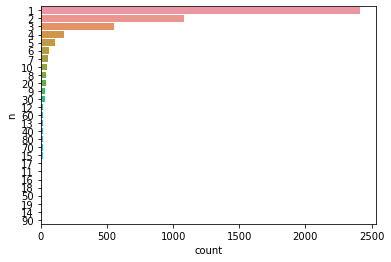

In [27]:
small_ordinals = ordinals[ordinals['n'] < 100]
sns.countplot(y = 'n', data = small_ordinals, 
              order = small_ordinals['n'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='n'>

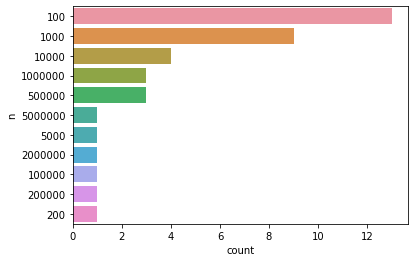

In [18]:
small_ordinals = ordinals[ordinals['n'] >= 100]
sns.countplot(y = 'n', data = small_ordinals, 
              order = small_ordinals['n'].value_counts().index)

По графикам видно, что наиболее часто употребляются порядковые числительные от 1 до 10 и числительные 20 и 30. Простые числительные больше 30 употребляются гораздо реже.

#### 3.1.2 Падеж

<AxesSubplot:xlabel='count', ylabel='case'>

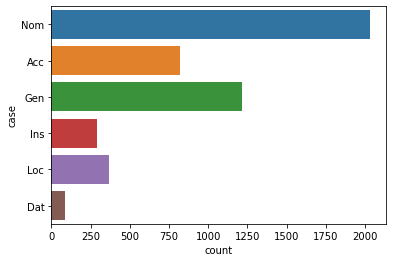

In [20]:
sns.countplot(y = 'case', data = ordinals)

Частотность употребления падежей получается такой: Nominative > Genitive > Accusative > Locative > Instrumental > Dative

#### 3.1.3 Род

<AxesSubplot:xlabel='count', ylabel='gender'>

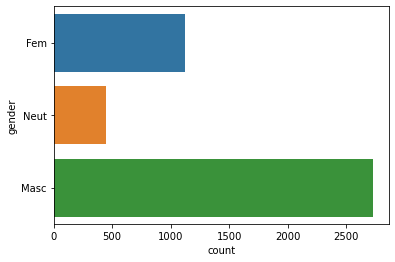

In [21]:
sns.countplot(y = 'gender', data = ordinals)

Употребление родов: мужской > женский > средний

#### 3.1.4 Число

<AxesSubplot:xlabel='count', ylabel='number'>

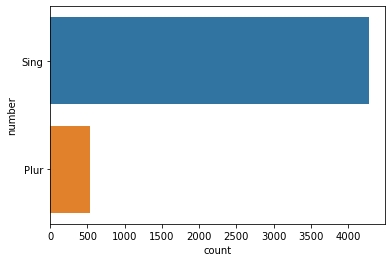

In [25]:
sns.countplot(y = 'number', data = ordinals)

Единственное число употребляется сильно чаще, чем множественное, что ожидаемо, учитывая семантику порядковых числительных: они обозначают единичный объект, указывая на его порядковый номер в каком-то ряду.

#### 3.1.5 Тип контекста

<AxesSubplot:xlabel='count', ylabel='Ord_type'>

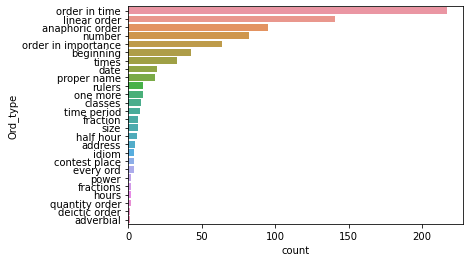

In [28]:
sns.countplot(y = 'Ord_type', data = ordinals,
             order = ordinals['Ord_type'].value_counts().index)

Наиболее часто порядковые числительные употребляются для того, чтобы показать очередность событий/появления объектов во времени, следующий по частотности контекст - линейный порядок, третий по частотности - анафорический порядок.

#### 3.1.6 Год

In [42]:
year = []
for y in ordinals['Created']:
    if '-' in y:
        s = y.split('-')
        n = (int(s[0]) + int(s[1]))/2
        year.append(n)
    else:
        year.append(int(y))
ordinals.insert(11, 'year', year)
ordinals.head()

,Unnamed: 0,Unnamed: 0.1,Center,n,lemma,case,number,gender,Author,Header,Created,year,Type,Full context,Ord_type
0,0,0,пятая,5,пятый,Nom,Sing,Fem,Н. Н. Пунин,Письма М. А. Голубевой,1950,1950.0,письмо личное,Посылки также стали опаздывать; пятая шла 20 д...,order in time
1,1,1,первая,1,первый,Nom,Sing,Fem,Н. Н. Пунин,Письма М. А. Голубевой,1950,1950.0,письмо личное,"Первая «восторженная» посылка обрадовала всех,...",order in time
2,2,2,второе,2,второй,Acc,Sing,Neut,Н. Н. Пунин,Письма М. А. Голубевой,1950,1950.0,письмо личное,Пользуюсь своим правом послать тебе второе пис...,order in time
3,3,3,первых,1,первый,Gen,Plur,NaN,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,2002.0,статья,Необходимо вмешаться в эту ситуацию и дать воз...,deictic order
4,4,4,первой,1,первый,Gen,Sing,Fem,епископ Иларион (Алфеев),Русская церковь и объединяющаяся Европа: персп...,2002,2002.0,статья,"Таким образом, первой и основной задачей брюсс...",order in importance


2. Распределение контекстов

<AxesSubplot:xlabel='year', ylabel='Count'>

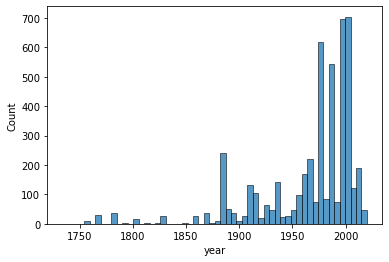

In [54]:
sns.histplot(x = 'year', data = ordinals)

Выборка не сбалансирована, наибольшее количество примеров приходится на ~1975-2005

#### 3.1.7 Жанр

In [60]:
t = list(set(ordinals['Type']))
n = len(t)
t1 = t[:int(n/2)]

<AxesSubplot:xlabel='count', ylabel='Type'>

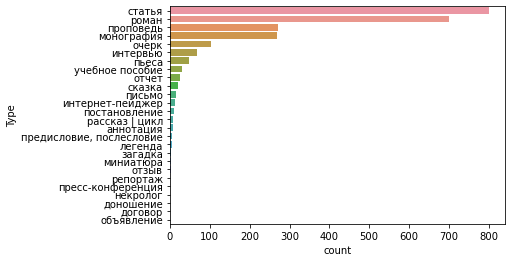

In [62]:
small_ordinals = ordinals[ordinals['Type'].isin(t1)]
sns.countplot(y = 'Type', data = small_ordinals,
             order = small_ordinals['Type'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Type'>

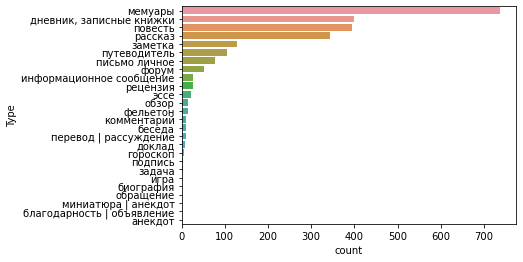

In [63]:
small_ordinals = ordinals[~ordinals['Type'].isin(t1)]
sns.countplot(y = 'Type', data = small_ordinals,
             order = small_ordinals['Type'].value_counts().index)

В выборке наиболее часто встречаются следующие жанры: статья > мемуары > роман > дневник > повесть > рассказ > проповедь > монография

### 3.2 Связь между переменными: визуальный анализ

In [64]:
import plotly.express as px

#### 3.2.1 Номинал и тип контекста

In [91]:
small_ordinals = ordinals[pd.notna(ordinals['Ord_type'])]
types = list(set(small_ordinals['Ord_type']))
n = len(types)
types1 = types[:int(n/2)]
types2 = types[int(n/2):]

In [100]:
small_ordinals1 = small_ordinals[small_ordinals['Ord_type'].isin(types1)]
small_ordinals1a = small_ordinals1[small_ordinals['n'] <= 10]
px.histogram(small_ordinals1a, x="lemma", facet_col="Ord_type", facet_col_wrap = 3)

<ipython-input-100-516c4d1016ce>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [101]:
small_ordinals1b = small_ordinals1[small_ordinals['n'] > 10]
px.histogram(small_ordinals1b, x="lemma", facet_col="Ord_type", facet_col_wrap = 3)

<ipython-input-101-2a08ff024855>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [104]:
small_ordinals2 = small_ordinals[small_ordinals['Ord_type'].isin(types2)]
small_ordinals2a = small_ordinals2[small_ordinals['n'] <= 10]
px.histogram(small_ordinals2a, x="lemma", facet_col="Ord_type", facet_col_wrap = 5)

<ipython-input-104-a126e2516593>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [106]:
small_ordinals2b = small_ordinals2[small_ordinals['n'] > 10]
px.histogram(small_ordinals2b, x="lemma", facet_col="Ord_type", facet_col_wrap = 5)

<ipython-input-106-ed8eadd31505>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



#### 3.2.2 Форма и тип контекста

In [136]:
small_ordinals_case = small_ordinals[pd.notna(small_ordinals['case'])]
px.histogram(small_ordinals_case, x="Ord_type", facet_col="case", facet_col_wrap = 1)

In [137]:
small_ordinals_gender = small_ordinals[pd.notna(small_ordinals['gender'])]
px.histogram(small_ordinals_gender, x="Ord_type", facet_col="gender", facet_col_wrap = 1)

In [138]:
small_ordinals_number = small_ordinals[pd.notna(small_ordinals['number'])]
px.histogram(small_ordinals_number, x="Ord_type", facet_col="number", facet_col_wrap = 1)

#### 3.2.2 Год создания текста и тип контекста

In [145]:
px.histogram(small_ordinals, x="year", facet_col="Ord_type", facet_col_wrap = 4)

Каких-то устаревших типов контекста или, наоборот, вошедших в употребление только недавно вроде бы не наблюдается.

#### 3.2.3 Жанр текста и тип контекста

In [153]:
px.histogram(small_ordinals, x="Type", facet_col="Ord_type", facet_col_wrap = 3)

### 3.3 Связь между переменными: статистический анализ

In [154]:
from scipy.stats import chi2_contingency

In [155]:
ch = pd.crosstab(small_ordinals['lemma'], small_ordinals['Ord_type'])
stat, p, dof, expected = chi2_contingency(ch)
p

1.6265896174991867e-230

In [156]:
ch = pd.crosstab(small_ordinals['case'], small_ordinals['Ord_type'])
stat, p, dof, expected = chi2_contingency(ch)
p

1.5942463781526176e-26

In [157]:
ch = pd.crosstab(small_ordinals['gender'], small_ordinals['Ord_type'])
stat, p, dof, expected = chi2_contingency(ch)
p

1.5107728150322307e-09

In [158]:
ch = pd.crosstab(small_ordinals['number'], small_ordinals['Ord_type'])
stat, p, dof, expected = chi2_contingency(ch)
p

4.241025757169482e-48

In [159]:
ch = pd.crosstab(small_ordinals['year'], small_ordinals['Ord_type'])
stat, p, dof, expected = chi2_contingency(ch)
p

2.986460496334251e-84

In [160]:
ch = pd.crosstab(small_ordinals['Type'], small_ordinals['Ord_type'])
stat, p, dof, expected = chi2_contingency(ch)
p

7.156167530668306e-122

## 4. Заключение

Все параметры оказались статистически значимыми для типа контекста!

Что нужно сделать дальше:
* построить какую-нибудь модель, которая показала бы, какие параметры связаны с типом контекста сильнее, а какие слабее (тут подошла бы полиномиальная регрессия, но я не справилась сделать её в питоне, буду, видимо, пытаться делать в аре)
* Сравнить то, что у меня получилось на этих данных, с контекстами, в которых порядковые числительные встречаются в Новом завете (у меня есть эти данные, но я не стала их сюда подключать)
* Сравнить контексты, в которых встречаются порядковые числительные в русском языке, с каким-нибудь ещё языком (можно по тому же Новому завету или параллельному корпусу Маленького принца)
* Подумать, что это всё значит с теоретической точки зрения и интегрировать это в статью в будущем